In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
from gensim import corpora
import pandas as pd
import statistics
import string
import os
import re


**Project:** Data Minining Project for  X company

The CRISP-DM Framework


The CRISP-DM methodology provides a structured approach to planning a data mining project. It is a robust and well-proven methodology.
* Business understanding (BU): Determine Business Objectives, Assess Situation, Determine Data Mining Goals, Produce Project Plan

* Data understanding (DU): Collect Initial Data, Describe Data, Explore Data, Verify Data Quality

* Data preparation (DP): Select Data, Clean Data, Construct Data, Integrate Data

* Modeling (M): Select modeling technique, Generate Test Design, Build Model, Assess Model
*  Evaluation (E): Evaluate Results, Review Process, Determine Next Steps
*  Deployment (D): Plan Deployment, Plan Monitoring and Maintenance, Produce Final Report, Review Project


References:

[What is the CRISP-DM methodology?](https://www.sv-europe.com/crisp-dm-methodology/)

[Introduction to CRISP DM Framework for Data Science and Machine Learning](https://www.linkedin.com/pulse/chapter-1-introduction-crisp-dm-framework-data-science-anshul-roy/)

**Data Set**
### The data is for company X which is trying to control attrition. 
### There are two sets of data: "Existing employees" and "Employees who have left". The following attributes are available for every employee.


*   Satisfaction Level

*   Last evaluation

*   Number of projects

*   Average monthly hours

*   Time spent at the company
*   Whether they have had a work accident


*  Whether they have had a promotion in the last 5 years


*   Departments (column sales)


*   Salary


*  Whether the employee has left


















**Your Role**
 

*   As data science team member X company asked you to answer this two questions.
*  What type of employees is leaving? 

*   Determine which employees are prone to leave next.






Business Understanding

---

This step mostly focuses on understanding the Business in all the different aspects. It follows the below different steps.




* Identify the goal and frame the business problem.
* Prepare Analytical Goal i.e. what type of performance metric and loss function to use
* Gather information on resource, constraints, assumptions, risks etc
* Gather information on resource, constraints, assumptions, risks etc
*   Prepare Work Flow Chart

### Write the main objectives of this project in your words?
minimum of 100 characters

In [8]:
main_objectives =''' 
the main objectives of this project is to classify the polarity of a given text at the document, sentence, or feature/aspect level—whether the expressed opinion in a document, a sentence or an entity feature/aspect is positive, negative, or neutral.'''

In [9]:
assert len(main_objectives) > 100 
### BEGIN HIDDEN TESTS
assert len(main_objectives) > 80 
### END HIDDEN TESTS

### Outline the different data analysis steps you will follow to carry out the project

In [10]:
dm_outline = '''
To improve your data analysis skills and simplify your decisions, execute these five steps in your data analysis process:
Step 1: Define Your Questions. ...
Step 2: Set Clear Measurement Priorities. ...
Step 3: Collect Data. ...
Step 4: Analyze Data. ...
Step 5: Interpret Results.
'''

In [11]:
assert len(dm_outline) > 100 
### BEGIN HIDDEN TESTS
assert len(dm_outline) > 70 
### END HIDDEN TESTS

### What metrics will you use to measure the performance of your data analysis model? 
Write the equations of the metrics here

e.g. Precision = $\frac{TP}{(TP + FP)}$



F1 Score
F1= 2**Precision **Recall/precision+Recall






Why do you choose these metrics? minimum of 100 characters

In [12]:
why_metrics = '''F1 Score is needed when you want to seek a balance between Precision and Recall. Right…so what is the difference between F1 Score and Accuracy then? accuracy can be largely contributed by a large number of True Negatives which in most business circumstances, we do not focus on much whereas False Negative and False Positive usually has business costs (tangible & intangible) thus F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).
'''

In [13]:
assert len(why_metrics) > 100 
### BEGIN HIDDEN TESTS
assert len(why_metrics) > 80 
### END HIDDEN TESTS

### How would you know if your data analysis work is a success or not?
minimum of 100 characters

In [14]:
how_success = '''Data analysis is supposed to be about the data, right? Just the facts? And for the most part it is, up until the point you need to communicate your findings to an audience. The problem is that in any data analysis that would be meaningful to others, there are simply too many results to present, and so choices must be made. Depending on who the audience is, or who the audience is composed of, you will need to tune your presentation in order to get the audience to accept the analysis. 

Good communication with an audience can often play a much bigger role in success than whether you used a linear model or quadratic model. Trust between an analyst and audience is critical when an analyst must make choices about what to present and what to omit. Admitting that human nature plays a role in data analysis success is difficult because humans are highly subjective, inconsistent, and difficult to quantify. However, I think doing so gives us a better understanding about how to judge the quality of data analyses and how to improve them in the future.

'''

In [15]:
assert len(how_success) > 100 
### BEGIN HIDDEN TESTS
assert len(how_success) > 80 
### END HIDDEN TESTS

## What kind of challenges do you expect in your analysis?
List at least 3 challenges

In [16]:
challenge_text = ''' 1) The amount of data being collected
With today’s data-driven organizations and the introduction of big data, risk managers and other employees are often overwhelmed with the amount of data that is collected. An organization may receive information on every incident and interaction that takes place on a daily basis, leaving analysts with thousands of interlocking data sets.

2) Visual representation of data
To be understood and impactful, data often needs to be visually presented in graphs or charts. While these tools are incredibly useful, it’s difficult to build them manually. Taking the time to pull information from multiple areas and put it into a reporting tool is frustrating and time-consuming.

3) Scaling data analysis
Finally, analytics can be hard to scale as an organization and the amount of data it collects grows. Collecting information and creating reports becomes increasingly complex. A system that can grow with the organization is crucial to manage this issue.
'''



In [17]:
assert len(challenge_text) > 100 
### BEGIN HIDDEN TESTS
assert len(how_success) > 80 
### END HIDDEN TESTS

<h2>Using the processed twitter data from yesterday's challenge</h2>.


- Form a new data frame (named `cleanTweet`), containing columns $\textbf{clean-text}$ and $\textbf{polarity}$.

- Write a function `text_category` that takes a value `p` and returns, depending on the value of p, a string `'positive'`, `'negative'` or `'neutral'`.

- Apply this function (`text_category`) on the $\textbf{polarity}$ column of `cleanTweet` in 1 above to form a new column called $\textbf{score}$ in `cleanTweet`.

- Visualize The $\textbf{score}$ column using piechart and barchart

<h5>Now we want to build a classification model on the clean tweet following the steps below:</h5>

* Remove rows from `cleanTweet` where $\textbf{polarity}$ $= 0$ (i.e where $\textbf{score}$ = Neutral) and reset the frame index.
* Construct a column $\textbf{scoremap}$ Use the mapping {'positive':1, 'negative':0} on the $\textbf{score}$ column
* Create feature and target variables `(X,y)` from $\textbf{clean-text}$ and $\textbf{scoremap}$ columns respectively.
* Use `train_test_split` function to construct `(X_train, y_train)` and `(X_test, y_test)` from `(X,y)`

* Build an `SGDClassifier` model from the vectorize train text data. Use `CountVectorizer()` with a $\textit{trigram}$ parameter.

* Evaluate your model on the test data.


In [18]:
tweets = pd.read_csv('cleaned_fintech_data.csv')

In [19]:
tweets.head()

,Unnamed: 0,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,...,original_author,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,timestamp
0,0.0,Thu Jun 17 06:26:34 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Giving forth life is becoming a burden in Keny...,Giving forth life becoming burden Kenya This m...,"Sentiment(polarity=0.3194444444444445, subject...",0.3194444444444445,0.5305555555555556,en,0,...,reen_law,398,70,223,NaN,NaN,janetmachuka_,NaN,NaN,2021-06-17 06:26:34+00:00
1,1.0,Thu Jun 17 06:26:37 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Teenmaar - 26cr\nPanja - 32.5cr\nGabbarsingh -...,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,in,0,...,Amigo9999_,19047,132,1084,NaN,NaN,maheshblood,NaN,India,2021-06-17 06:26:37+00:00
2,2.0,Thu Jun 17 06:26:42 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Rei chintu 2013 lo Vachina Ad Nizam ne 2018 lo...,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,hi,0,...,MallaSuhaas,47341,2696,2525,NaN,NaN,Hail_Kalyan,NaN,Vizag,2021-06-17 06:26:42+00:00
3,3.0,Thu Jun 17 06:26:44 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Today is World Day to Combat #Desertification ...,Today World Day Combat Restoring degraded land...,"Sentiment(polarity=0.25, subjectivity=0.65)",0.25,0.65,en,0,...,CIACOceania,7039,343,387,NaN,"Desertification, Drought, resilience",EdwardVrkic,NaN,Papua New Guinea,2021-06-17 06:26:44+00:00
4,4.0,Thu Jun 17 06:26:47 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Hearing #GregHunt say he's confident vaccines ...,Hearing say 's confident vaccines delivered li...,"Sentiment(polarity=0.5, subjectivity=0.8333333...",0.5,0.8333333333333334,en,0,...,MccarronWendy,26064,419,878,NaN,"GregHunt, Morrison",WriteWithDave,NaN,"Sydney, New South Wales",2021-06-17 06:26:47+00:00


In [20]:
cleanTweet= pd.DataFrame(columns=['clean_text','polarity'])
cleanTweet['polarity'] =  tweets['polarity'].to_list()
cleanTweet['clean_text'] =  tweets['clean_text'].to_list()   

In [21]:
cleanTweet.dropna()
cleanTweet

,clean_text,polarity
0,Giving forth life becoming burden Kenya This m...,0.3194444444444445
1,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,0.0
2,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,0.0
3,Today World Day Combat Restoring degraded land...,0.25
4,Hearing say 's confident vaccines delivered li...,0.5
...,...,...
5616,Lambie voted AGAINST Medivac Carbon tax protec...,0.13636363636363635
5617,Idhi bathuku Most Day1 Records In Nizam Non BB...,0.5
5618,welkin moon giveaway bc finally money -u got t...,0.15416666666666667
5619,Manam edi chesina Daaniki kuda elevation istad...,0.0


In [22]:
def text_category(p):
        if p > 0:
            return 'positive'
        elif p < 0:
            return 'negative'
        else:
            return 'neutral'
            

In [23]:
cleanTweet['polarity'] = pd.to_numeric(cleanTweet['polarity'],errors='coerce') # change polarity to numeric
cleanTweet['score'] = cleanTweet['polarity'].apply(text_category)
cleanTweet.head()

,clean_text,polarity,score
0,Giving forth life becoming burden Kenya This m...,0.319444,positive
1,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,0.000000,neutral
2,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,0.000000,neutral
3,Today World Day Combat Restoring degraded land...,0.250000,positive
4,Hearing say 's confident vaccines delivered li...,0.500000,positive


In [154]:
#Visualize The  𝐬𝐜𝐨𝐫𝐞  column using piechart and barchart
#summary function about the score
def summerize(x):
    return {
        'positive': x.count('positive'),
        'neutral': x.count('neutral'),
        'negative': x.count('negative')  }

In [155]:
summary = summerize(list(cleanTweet['score']))
labels = list(summary.keys())
data = [summary[key] for key in summary.keys()]

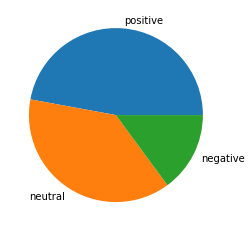

In [156]:
# plot it
fig = plt.figure()
plt.pie(data, labels = labels)
plt.show()

In [158]:
# Remove rows from cleanTweest where  𝐩𝐨𝐥𝐚𝐫𝐢𝐭𝐲   = 0  (i.e where  𝐬𝐜𝐨𝐫𝐞  = Neutral) and reset the frame index.
cleanTweet = cleanTweet[cleanTweet['score'] != 'neutral'].reset_index(drop=True)

In [159]:
cleanTweet.head()

,clean_text,polarity,score
0,Giving forth life becoming burden Kenya This m...,0.319444,positive
1,Today World Day Combat Restoring degraded land...,0.250000,positive
2,Hearing say 's confident vaccines delivered li...,0.500000,positive
3,Today World Day Combat Restoring degraded land...,0.250000,positive
4,Austria `` right '' grid tariffs regulatory re...,0.285714,positive


In [160]:
# Construct a column  𝐬𝐜𝐨𝐫𝐞𝐦𝐚𝐩  Use the mapping {'positive':1, 'negative':0} on the  𝐬𝐜𝐨𝐫𝐞  column
def score_to_bin(scr):
    scor = (1 if scr == 'positive' else 0)
    return scor

In [164]:
cleanTweet['scoremap'] = cleanTweet['score'].apply(score_to_bin).dropna()

In [166]:
cleanTweet.head()

,clean_text,polarity,score,scoremap
0,Giving forth life becoming burden Kenya This m...,0.319444,positive,1
1,Today World Day Combat Restoring degraded land...,0.250000,positive,1
2,Hearing say 's confident vaccines delivered li...,0.500000,positive,1
3,Today World Day Combat Restoring degraded land...,0.250000,positive,1
4,Austria `` right '' grid tariffs regulatory re...,0.285714,positive,1


In [167]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier

In [168]:
X,y = list(cleanTweet['clean_text'].values.astype('U')),list(cleanTweet['scoremap'])
vectorizer = CountVectorizer(ngram_range=(3, 3))
X = vectorizer.fit_transform(X).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [169]:
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [172]:
clf.score(X_test,y_test)

0.9914040114613181